## Bandit Algorithm Quiz

### 1. epsilons = [0.1, 0.3, 0.01]`: 탐험 확률(ε) 값들을 저장


In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Bandit:
    def __init__(self, arms=10): #arms = 슬롯머신 대수
        self.rates = np.random.rand(arms) # 슬롯머신 각각의 승률 설정(무작위)

    def play(self, arm) :
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon # 무작위로 행동할 확률(탐색 확률)
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    # 슬롯머신의 가치 추정
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    # 행동 선택(e-탐욕 정책)
    def get_action(self) :
        if np.random.rand() < self.epsilon :
            return np.random.randint (0, len(self.Qs)) # 무작위 행동 선택
        return np.argmax(self.Qs) # 탐욕 행동 선택

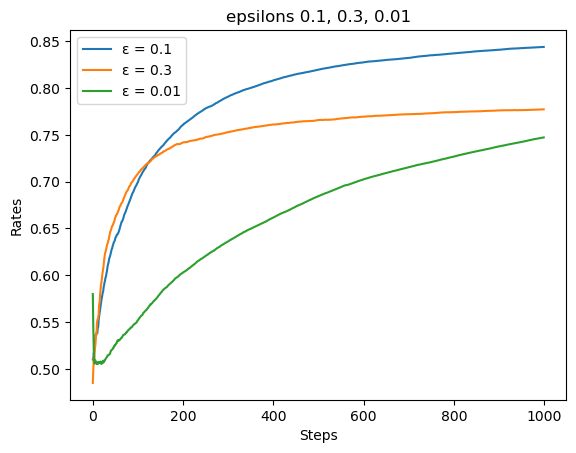

In [18]:
runs = 200  # 반복 실험 수
steps = 1000  # 각 실험의 총 단계 수
epsilons = [0.1, 0.3, 0.01]  # ε 값들


for epsilon in epsilons:
    all_rates = np.zeros((runs, steps))  # 각 실험의 승률을 저장할 배열
    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []  # 각 단계에서의 누적 승률
        for step in range(steps):
            action = agent.get_action()  # 행동 선택
            reward = bandit.play(action)  # 보상 획득
            agent.update(action, reward)  # 에이전트 학습
            total_reward += reward
            rates.append(total_reward / (step + 1))  # 누적 승률 계산
        all_rates[run] = rates  # 이번 실험의 결과 저장

    avg_rates = np.mean(all_rates, axis=0)  # 모든 실험의 평균 승률 계산
    plt.plot(avg_rates, label=f"ε = {epsilon}")  # ε별 평균 승률 그래프

# 그래프 설정
plt.title("epsilons 0.1, 0.3, 0.01")
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.legend()
plt.show()